In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-analysis/supply_chain_data.csv


# Data Processing

In [2]:
import torch, numpy as np, pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/supply-chain-analysis/supply_chain_data.csv')
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,9,Carrier B,8.630339,Supplier 4,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,Carrier C,5.352878,Supplier 3,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,9,Carrier A,7.904846,Supplier 4,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,7,Carrier B,1.409801,Supplier 5,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


<Axes: >

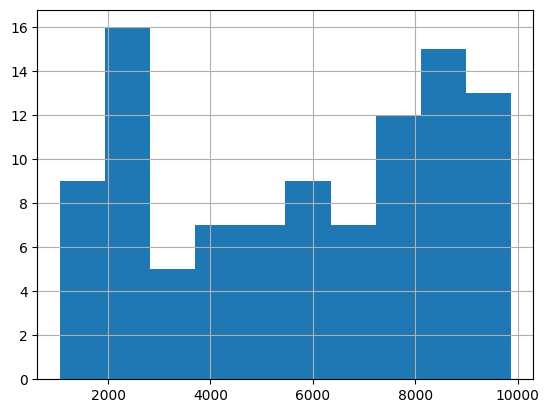

In [6]:
df['Revenue generated'].hist()

<Axes: >

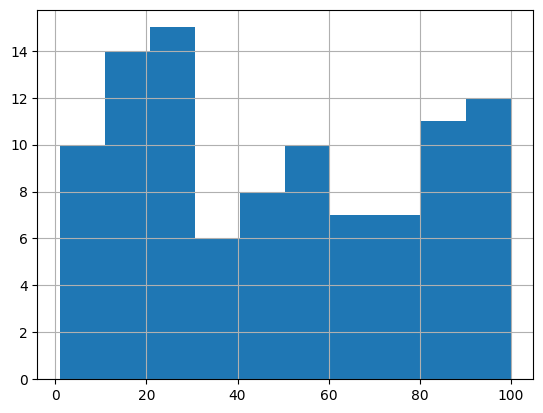

In [7]:
df['Availability'].hist()

<Axes: >

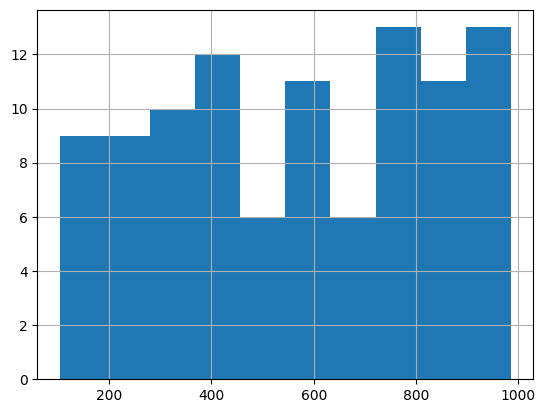

In [8]:
df['Production volumes'].hist()

<Axes: >

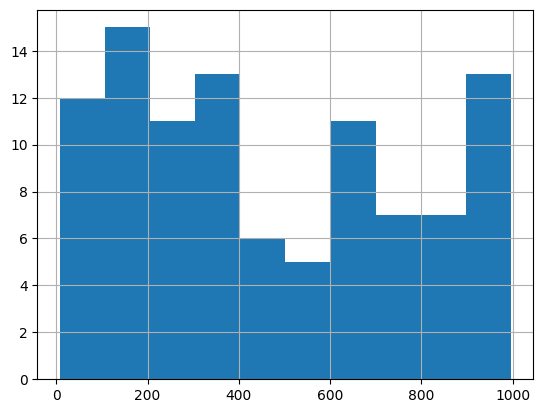

In [9]:
df['Number of products sold'].hist()

<Axes: >

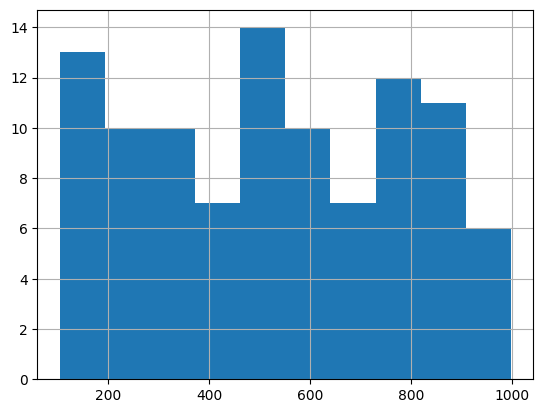

In [10]:
df['Costs'].hist()

<Axes: >

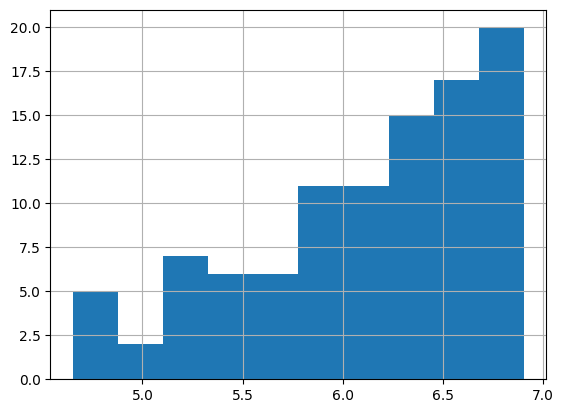

In [11]:
df['LogCosts'] = np.log(df['Costs']+1)
df['LogCosts'].hist()

In [12]:
df = pd.get_dummies(df, columns=["Product type","Customer demographics","Location", "Inspection results", "Transportation modes", "Routes", "Shipping carriers", "Supplier name"])
df.columns

Index(['SKU', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities',
       'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs', 'LogCosts', 'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'Customer demographics_Female',
       'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Kolkata',
       'Location_Mumbai', 'Inspection results_Fail', 'Inspection results_Pass',
       'Inspection results_Pending', 'Transportation modes_Air',
       'Transportation modes_Rail', 'Transportation modes_Road',
       'Transportation modes_Sea', 'Routes_Route A', 'Routes_Route B',
       'Routes_Route C', 'Shipping carriers_Carrier A',
       'Shipping carriers

In [13]:
added_cols = ['Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'Customer demographics_Female', 'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Location_Bangalore', 'Location_Chennai', 'Location_Delhi', 'Location_Kolkata', 'Location_Mumbai',
       'Inspection results_Fail', 'Inspection results_Pass', 'Inspection results_Pending', 'Transportation modes_Air',
       'Transportation modes_Rail', 'Transportation modes_Road', 'Transportation modes_Sea', 'Routes_Route A', 'Routes_Route B',
       'Routes_Route C','Shipping carriers_Carrier A',
       'Shipping carriers_Carrier B', 'Shipping carriers_Carrier C',
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5']
df[added_cols].head()

,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False
1,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False
2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False


In [14]:
df.replace({True: 1}, inplace=True)
df.replace({False: 0}, inplace=True)

df[added_cols].head()

,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [15]:
df


,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,LogCosts,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,SKU0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075,5.240434,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,SKU1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579,6.222706,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,SKU2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282,4.962287,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,SKU3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159,5.544303,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,SKU4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632,6.829189,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SKU95,77.903927,65,672,7386.363944,15,14,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241,6.659120,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
96,SKU96,24.423131,29,324,7698.424766,67,2,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141,5.245666,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
97,SKU97,3.526111,56,62,4370.916580,46,19,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423,6.293664,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
98,SKU98,19.754605,43,913,8525.952560,53,1,27,7,1.409801,28,581,9,5.604691,2.908122,882.198864,6.783550,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [16]:
df = df.rename(columns={'Lead times': 'Processing Lead Times', 'Lead time' : 'Shipping Lead Times', 'Manufacturing lead time':'Manufacturing Lead Times'})
df

,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Processing Lead Times,Order quantities,Shipping times,Shipping costs,Shipping Lead Times,Production volumes,Manufacturing Lead Times,Manufacturing costs,Defect rates,Costs,LogCosts,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
0,SKU0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075,5.240434,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,SKU1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579,6.222706,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,SKU2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282,4.962287,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,SKU3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159,5.544303,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,SKU4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632,6.829189,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SKU95,77.903927,65,672,7386.363944,15,14,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241,6.659120,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
96,SKU96,24.423131,29,324,7698.424766,67,2,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141,5.245666,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
97,SKU97,3.526111,56,62,4370.916580,46,19,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423,6.293664,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
98,SKU98,19.754605,43,913,8525.952560,53,1,27,7,1.409801,28,581,9,5.604691,2.908122,882.198864,6.783550,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


# Labeling data

In [17]:
df['Risky'] = 0
df.loc[df['Inspection results_Fail']==1, 'Risky'] = 1
df['Caution'] = 0
df.loc[df['Inspection results_Pending']==1, 'Caution'] = 1
df['Safe'] = 0
df.loc[df['Inspection results_Pass']==1, 'Safe'] = 1

In [18]:
columns = ['Inspection results_Fail', 'Inspection results_Pending','Inspection results_Pass', 'Risky', 'Caution', 'Safe']
df[columns].head()

,Inspection results_Fail,Inspection results_Pending,Inspection results_Pass,Risky,Caution,Safe
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,0,1,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [19]:
df

,SKU,Price,Availability,Number of products sold,Revenue generated,Stock levels,Processing Lead Times,Order quantities,Shipping times,Shipping costs,Shipping Lead Times,Production volumes,Manufacturing Lead Times,Manufacturing costs,Defect rates,Costs,LogCosts,Product type_cosmetics,Product type_haircare,Product type_skincare,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai,Inspection results_Fail,Inspection results_Pass,Inspection results_Pending,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route A,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5,Risky,Caution,Safe
0,SKU0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,29,215,29,46.279879,0.226410,187.752075,5.240434,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,SKU1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,23,517,30,33.616769,4.854068,503.065579,6.222706,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,SKU2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,12,971,27,30.688019,4.580593,141.920282,4.962287,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3,SKU3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,24,937,18,35.624741,4.746649,254.776159,5.544303,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
4,SKU4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,5,414,3,92.065161,3.145580,923.440632,6.829189,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SKU95,77.903927,65,672,7386.363944,15,14,26,9,8.630339,18,450,26,58.890686,1.210882,778.864241,6.659120,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
96,SKU96,24.423131,29,324,7698.424766,67,2,32,3,5.352878,28,648,28,17.803756,3.872048,188.742141,5.245666,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
97,SKU97,3.526111,56,62,4370.916580,46,19,4,9,7.904846,10,535,13,65.765156,3.376238,540.132423,6.293664,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
98,SKU98,19.754605,43,913,8525.952560,53,1,27,7,1.409801,28,581,9,5.604691,2.908122,882.198864,6.783550,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [20]:
df.columns

Index(['SKU', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Processing Lead Times',
       'Order quantities', 'Shipping times', 'Shipping costs',
       'Shipping Lead Times', 'Production volumes', 'Manufacturing Lead Times',
       'Manufacturing costs', 'Defect rates', 'Costs', 'LogCosts',
       'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'Customer demographics_Female',
       'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Kolkata',
       'Location_Mumbai', 'Inspection results_Fail', 'Inspection results_Pass',
       'Inspection results_Pending', 'Transportation modes_Air',
       'Transportation modes_Rail', 'Transportation modes_Road',
       'Transportation modes_Sea', 'Routes_Route A', 'Routes_Route B',
       'Routes_Route C', 'Shipping carriers_Carrier 

# Linear model

In [21]:
from torch import tensor
dep_cols = ['Risky', 'Caution', 'Safe']
dep = ['Risky']
indep_cols = ['Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Processing Lead Times',
       'Order quantities', 'Shipping times', 'Shipping costs',
       'Shipping Lead Times', 'Production volumes', 'Manufacturing Lead Times',
       'Manufacturing costs', 'Defect rates', 'Costs',
       'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'Customer demographics_Female',
       'Customer demographics_Male', 'Customer demographics_Non-binary',
       'Customer demographics_Unknown', 'Location_Bangalore',
       'Location_Chennai', 'Location_Delhi', 'Location_Kolkata',
       'Location_Mumbai', 'Inspection results_Fail', 'Inspection results_Pass',
       'Inspection results_Pending', 'Transportation modes_Air',
       'Transportation modes_Rail', 'Transportation modes_Road',
       'Transportation modes_Sea', 'Routes_Route A', 'Routes_Route B',
       'Routes_Route C', 'Shipping carriers_Carrier A',
       'Shipping carriers_Carrier B', 'Shipping carriers_Carrier C',
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_dep = tensor(df[dep_cols].values, dtype=torch.float)
t_dep1 = tensor(df.Risky)

In [22]:
from torch import tensor
dep_cols = ['Risky', 'Caution', 'Safe']
dep = ['Risky']
indep_cols = ['Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Processing Lead Times',
       'Order quantities', 'Shipping times', 'Shipping costs',
       'Shipping Lead Times', 'Production volumes', 'Manufacturing Lead Times',
       'Manufacturing costs', 'Defect rates', 'Costs', 'Inspection results_Fail', 'Inspection results_Pass',
       'Inspection results_Pending',
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_dep = tensor(df[dep_cols].values, dtype=torch.float)
t_dep1 = tensor(df.Risky)

In [23]:
from torch import tensor
dep_cols = ['Risky', 'Caution', 'Safe']
dep = ['Risky']
indep_cols = ['Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Processing Lead Times',
       'Order quantities', 'Shipping times', 'Shipping costs',
       'Shipping Lead Times', 'Production volumes', 'Manufacturing Lead Times',
       'Manufacturing costs', 'Defect rates', 'Costs',
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_dep = tensor(df[dep_cols].values, dtype=torch.float)
t_dep1 = tensor(df.Risky)

In [24]:
t_indep

tensor([[ 69.8080,  55.0000, 802.0000,  ...,   1.0000,   0.0000,   0.0000],
        [ 14.8435,  95.0000, 736.0000,  ...,   1.0000,   0.0000,   0.0000],
        [ 11.3197,  34.0000,   8.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [  3.5261,  56.0000,  62.0000,  ...,   0.0000,   1.0000,   0.0000],
        [ 19.7546,  43.0000, 913.0000,  ...,   0.0000,   0.0000,   1.0000],
        [ 68.5178,  17.0000, 627.0000,  ...,   0.0000,   0.0000,   0.0000]])

In [25]:
t_dep

tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0

In [26]:
t_dep1

tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1])

In [27]:
t_indep.shape

torch.Size([100, 20])

In [28]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866])

In [29]:
t_indep*coeffs

tensor([[-3.2314e+01,  7.6219e+00,  1.9320e+02,  ..., -2.4110e-01,
          0.0000e+00,  0.0000e+00],
        [-6.8711e+00,  1.3165e+01,  1.7730e+02,  ..., -2.4110e-01,
          0.0000e+00,  0.0000e+00],
        [-5.2399e+00,  4.7117e+00,  1.9272e+00,  ..., -0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-1.6322e+00,  7.7604e+00,  1.4936e+01,  ..., -0.0000e+00,
          4.8903e-02,  0.0000e+00],
        [-9.1444e+00,  5.9589e+00,  2.1994e+02,  ..., -0.0000e+00,
          0.0000e+00,  8.6613e-02],
        [-3.1717e+01,  2.3558e+00,  1.5104e+02,  ..., -0.0000e+00,
          0.0000e+00,  0.0000e+00]])

Normalization

In [30]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep/vals
t_indep

tensor([[0.7039, 0.5500, 0.8052,  ..., 1.0000, 0.0000, 0.0000],
        [0.1497, 0.9500, 0.7390,  ..., 1.0000, 0.0000, 0.0000],
        [0.1141, 0.3400, 0.0080,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0356, 0.5600, 0.0622,  ..., 0.0000, 1.0000, 0.0000],
        [0.1992, 0.4300, 0.9167,  ..., 0.0000, 0.0000, 1.0000],
        [0.6909, 0.1700, 0.6295,  ..., 0.0000, 0.0000, 0.0000]])

In [31]:
t_indep*coeffs

tensor([[-0.3258,  0.0762,  0.1940,  ..., -0.2411,  0.0000,  0.0000],
        [-0.0693,  0.1317,  0.1780,  ..., -0.2411,  0.0000,  0.0000],
        [-0.0528,  0.0471,  0.0019,  ..., -0.0000,  0.0000,  0.0000],
        ...,
        [-0.0165,  0.0776,  0.0150,  ..., -0.0000,  0.0489,  0.0000],
        [-0.0922,  0.0596,  0.2208,  ..., -0.0000,  0.0000,  0.0866],
        [-0.3198,  0.0236,  0.1517,  ..., -0.0000,  0.0000,  0.0000]])

In [32]:
preds = (t_indep*coeffs).sum(axis=1)
preds[:10]

tensor([-0.0298,  0.1410,  0.9806,  0.3370,  0.7899,  0.3925,  0.2642, -0.7174,
         0.0104, -0.0097])

In [33]:
loss = torch.abs(preds-t_dep1).mean()
loss

tensor(0.5234)

In [34]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [35]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866], requires_grad=True)

In [36]:
loss = calc_loss(coeffs, t_indep, t_dep1)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep1))

tensor(0.5180)


In [37]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [38]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep1[trn_split],t_dep1[val_split]
len(trn_indep),len(val_indep)


(80, 20)

In [39]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [40]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs


In [41]:
coeffs = train_model(18, lr = 0.01)

0.542; 0.542; 0.541; 0.540; 0.540; 0.539; 0.538; 0.538; 0.537; 0.537; 0.536; 0.535; 0.535; 0.534; 0.534; 0.533; 0.533; 0.532; 

In [42]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()


{'Price': tensor(-0.4410),
 'Availability': tensor(0.1350),
 'Number of products sold': tensor(0.2403),
 'Revenue generated': tensor(-0.2203),
 'Stock levels': tensor(-0.2563),
 'Processing Lead Times': tensor(-0.3047),
 'Order quantities': tensor(0.4794),
 'Shipping times': tensor(0.3141),
 'Shipping costs': tensor(0.2819),
 'Shipping Lead Times': tensor(-0.4210),
 'Production volumes': tensor(0.2056),
 'Manufacturing Lead Times': tensor(0.3439),
 'Manufacturing costs': tensor(0.1767),
 'Defect rates': tensor(0.2411),
 'Costs': tensor(-0.3464),
 'Supplier name_Supplier 1': tensor(-0.0052),
 'Supplier name_Supplier 2': tensor(-0.1841),
 'Supplier name_Supplier 3': tensor(-0.2316),
 'Supplier name_Supplier 4': tensor(0.0534),
 'Supplier name_Supplier 5': tensor(0.0889)}

In [43]:
preds = calc_preds(coeffs, val_indep)
results = val_dep.bool()==(preds>0.5)
results[:16]


tensor([False,  True,  True,  True,  True,  True, False,  True, False, False,
         True,  True,  True,  True, False,  True])

In [44]:
results.float().mean()

tensor(0.6500)

In [45]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)


tensor(0.6500)

Sigmoid function

In [46]:
preds[:28]

tensor([ 0.2483,  0.0376,  0.1287,  0.0148,  0.1419,  0.3014,  0.4558, -0.3243,
         1.2093,  0.6363,  0.5618,  0.1041, -0.4407,  0.3915,  0.4613, -0.1656,
        -0.4019,  0.6189,  0.2983,  0.6217])

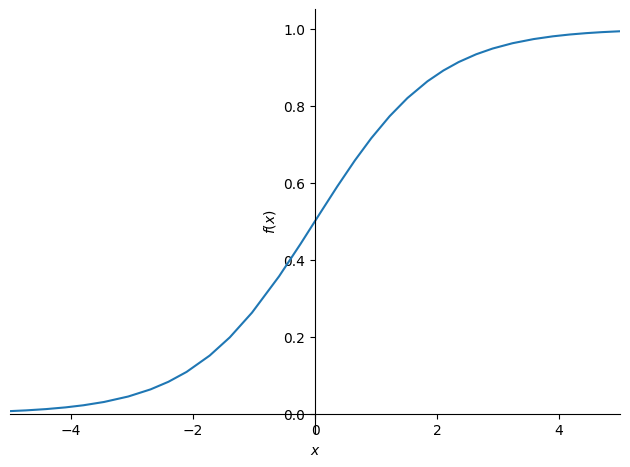

In [47]:
import sympy
sympy.plot('1/(1+exp(-x))', xlim = (-5,5));

In [48]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))
coeffs = train_model(lr=100)

0.502; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [49]:
acc(coeffs)

tensor(0.7000)

# Matrix multiplication

In [50]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]


In [51]:
coeffs = train_model(lr=100)

0.529; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [52]:
acc(coeffs)

tensor(0.7000)

# Neural Network

In [53]:
def init_coeffs(n_hidden = 20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden,1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [54]:
import torch.nn.functional as F
def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [55]:
def update_coeffs(coeffs,lr):
    for layer in coeffs:
        layer.sub_(layer.grad*lr)
        layer.grad.zero_()


In [56]:
coeffs = train_model(lr=20)

0.537; 0.452; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [57]:
acc(coeffs)

tensor(0.7000)

**With multiple layers**

In [58]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [59]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)


In [60]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [61]:
coeffs = train_model(lr=4)


0.557; 0.484; 0.434; 0.377; 0.376; 0.376; 0.376; 0.376; 0.376; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [62]:
acc(coeffs)


tensor(0.7000)